In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [ ]:
df = pd.read_excel("loan.xlsx")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

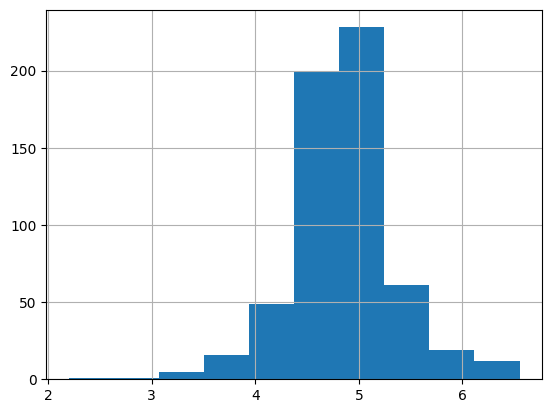

In [ ]:
df["LoanAmount_log"] = np.log(df["LoanAmount"])
df["LoanAmount_log"].hist()

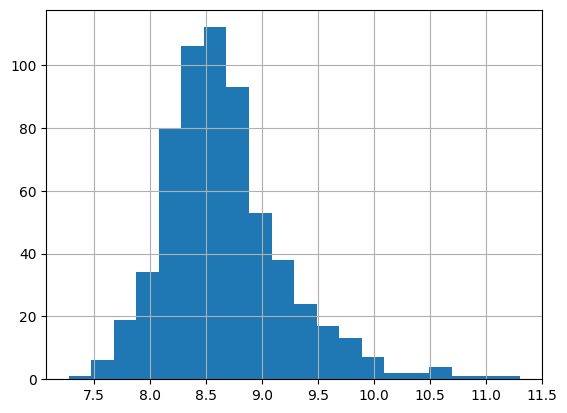

In [ ]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["TotalIncome_log"] = np.log(df["TotalIncome"])
df["TotalIncome_log"].hist(bins=20);

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["LoanAmount_log"]=df["LoanAmount_log"].fillna(df["LoanAmount_log"].mean())
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [ ]:
X = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

In [ ]:
"""
# Using iloc
df.iloc[0]  # Accesses the first row
df.iloc[:, 1]  # Accesses the second column
df.iloc[0:5, 1:3]  # Accesses rows 0 to 4 and columns 1 to 2

# Using loc
df.loc['row_label']  # Accesses the row with label 'row_label'
df.loc[:, 'column_label']  # Accesses the column with label 'column_label'
df.loc['row_label_1':'row_label_5', 'column_label_1':'column_label_3']  # Accesses rows and columns by labels

"""

"\n# Using iloc\ndf.iloc[0]  # Accesses the first row\ndf.iloc[:, 1]  # Accesses the second column\ndf.iloc[0:5, 1:3]  # Accesses rows 0 to 4 and columns 1 to 2\n\n# Using loc\ndf.loc['row_label']  # Accesses the row with label 'row_label'\ndf.loc[:, 'column_label']  # Accesses the column with label 'column_label'\ndf.loc['row_label_1':'row_label_5', 'column_label_1':'column_label_3']  # Accesses rows and columns by labels\n\n"

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()


In [ ]:
X_train

array([[1, 1, 0, ..., 1.0, 5.579729825986222, 346],
       [1, 1, 0, ..., 1.0, 4.875197323201151, 258],
       [1, 1, 2, ..., 1.0, 5.3471075307174685, 341],
       ...,
       [0, 0, 0, ..., 1.0, 3.4011973816621555, 43],
       [0, 1, 0, ..., 1.0, 4.857444178729352, 381],
       [1, 1, 0, ..., 1.0, 4.857444178729352, 414]], dtype=object)

In [ ]:
X_train[1]

array([1, 1, 0, 'Graduate', 360.0, 1.0, 4.875197323201151, 258],
      dtype=object)

In [ ]:
X_train[2]

array([1, 1, 2, 'Graduate', 360.0, 1.0, 5.3471075307174685, 341],
      dtype=object)

In [ ]:
for i in range(0, 5):
    X_train[:,i] = X_train[:,i].astype(str)
    X_train[:,i] = Labelencoder_x.fit_transform(X_train[:,i])
    X_train[:,7] = Labelencoder_x.fit_transform(X_train[:,7])

X_train

array([[1, 1, 0, ..., 1.0, 5.579729825986222, 346],
       [1, 1, 0, ..., 1.0, 4.875197323201151, 258],
       [1, 1, 2, ..., 1.0, 5.3471075307174685, 341],
       ...,
       [0, 0, 0, ..., 1.0, 3.4011973816621555, 43],
       [0, 1, 0, ..., 1.0, 4.857444178729352, 381],
       [1, 1, 0, ..., 1.0, 4.857444178729352, 414]], dtype=object)

In [ ]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)
y_train

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [ ]:
for i in range(0, 5):
    X_test[:,i] = X_test[:,i].astype(str)
    X_test[:,i] = Labelencoder_x.fit_transform(X_test[:,i])
    X_test[:,7] = Labelencoder_x.fit_transform(X_test[:,7])

X_test

In [ ]:
Labelencoder_y = LabelEncoder()
y_test = Labelencoder_y.fit_transform(y_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)
print("acc: ",metrics.accuracy_score(y_pred, y_test))

y_pred

acc:  0.7642276422764228


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)


GaussianNB()

In [ ]:
from sklearn import metrics
y_pred = nb_clf.predict(X_test)
print("acc: ",metrics.accuracy_score(y_pred, y_test))

y_pred

acc:  0.7886178861788617


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

from sklearn import metrics
y_pred = dt_clf.predict(X_test)
print("acc: ",metrics.accuracy_score(y_pred, y_test))

y_pred

acc:  0.6341463414634146


array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
dt_clf = KNeighborsClassifier()
dt_clf.fit(X_train, y_train)

from sklearn import metrics
y_pred = dt_clf.predict(X_test)
print("acc: ",metrics.accuracy_score(y_pred, y_test))

y_pred

acc:  0.7642276422764228


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])